In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn(input_shape=(64, 64, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [2]:
import cv2
import numpy as np

def preprocess_image(image):
    image = cv2.resize(image, (64, 64))  # Resize to 64x64
    image = image / 255.0  # Normalize
    return np.expand_dims(image, axis=0)  # Add batch dimension


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("davidvazquezcic/yawn-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\brain\.cache\kagglehub\datasets\davidvazquezcic\yawn-dataset\versions\1


In [10]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
base_dir = "C:/Users/brain/Desktop/VIGILO_DEPLOY/Test/1"  # Replace with the path to your dataset
yawn_dir = os.path.join(base_dir, "yawn")
no_yawn_dir = os.path.join(base_dir, "no_yawn")

# Create directories for train and validation sets
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

train_yawn_dir = os.path.join(train_dir, "yawn")
train_no_yawn_dir = os.path.join(train_dir, "no_yawn")
val_yawn_dir = os.path.join(val_dir, "yawn")
val_no_yawn_dir = os.path.join(val_dir, "no_yawn")

os.makedirs(train_yawn_dir, exist_ok=True)
os.makedirs(train_no_yawn_dir, exist_ok=True)
os.makedirs(val_yawn_dir, exist_ok=True)
os.makedirs(val_no_yawn_dir, exist_ok=True)

# Get image file names
yawn_files = [os.path.join(yawn_dir, f) for f in os.listdir(yawn_dir) if f.endswith(".jpg")]
no_yawn_files = [os.path.join(no_yawn_dir, f) for f in os.listdir(no_yawn_dir) if f.endswith(".jpg")]

# Split data into training and validation sets
yawn_train, yawn_val = train_test_split(yawn_files, test_size=0.2, random_state=42)
no_yawn_train, no_yawn_val = train_test_split(no_yawn_files, test_size=0.2, random_state=42)

# Copy files to train and validation directories
def copy_files(file_list, dest_dir):
    for file_path in file_list:
        shutil.copy(file_path, dest_dir)

copy_files(yawn_train, train_yawn_dir)
copy_files(yawn_val, val_yawn_dir)
copy_files(no_yawn_train, train_no_yawn_dir)
copy_files(no_yawn_val, val_no_yawn_dir)

print("Data successfully split into train and validation sets!")


Data successfully split into train and validation sets!


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Paths to your dataset
train_dir = "C:/Users/brain/Desktop/VIGILO_DEPLOY/Test/1/train"
val_dir = "C:/Users/brain/Desktop/VIGILO_DEPLOY/Test/1/val"

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  # Binary classification: yawn or no_yawn
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# Build a CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Save the Model
model.save('yawn_detection_model.h5')


Found 4094 images belonging to 2 classes.
Found 1025 images belonging to 2 classes.


c:\Users\brain\Desktop\VIGILO_DEPLOY\Test\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\brain\Desktop\VIGILO_DEPLOY\Test\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.7789 - loss: 0.4471 - val_accuracy: 0.9278 - val_loss: 0.2113
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 26s 201ms/step - accuracy: 0.9404 - loss: 0.1793 - val_accuracy: 0.9385 - val_loss: 0.1752
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 26s 206ms/step - accuracy: 0.9392 - loss: 0.1657 - val_accuracy: 0.9600 - val_loss: 0.1196
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 30s 232ms/step - accuracy: 0.9641 - loss: 0.1022 - val_accuracy: 0.9620 - val_loss: 0.1192
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 28s 222ms/step - accuracy: 0.9737 - loss: 0.0825 - val_accuracy: 0.9590 - val_loss: 0.1248
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 31s 243ms/step - accuracy: 0.9742 - loss: 0.0736 - val_accuracy: 0.9620 - val_loss: 0.1104
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 30s 231ms/step - accuracy: 0.9869 - loss: 0.0486 - val_accuracy: 0.9512 - val_loss: 0.1532
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 28s 221ms/step - accuracy: 0.9766 - loss: 0

Found 4094 images belonging to 2 classes.
Found 512 images belonging to 2 classes.
Found 513 images belonging to 2 classes.
Epoch 1/10


c:\Users\brain\Desktop\VIGILO_DEPLOY\Test\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\brain\Desktop\VIGILO_DEPLOY\Test\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


128/128 ━━━━━━━━━━━━━━━━━━━━ 29s 214ms/step - accuracy: 0.7614 - loss: 0.4999 - val_accuracy: 0.9277 - val_loss: 0.1857
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 208ms/step - accuracy: 0.9451 - loss: 0.1702 - val_accuracy: 0.9316 - val_loss: 0.1895
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 26s 204ms/step - accuracy: 0.9470 - loss: 0.1580 - val_accuracy: 0.9590 - val_loss: 0.1270
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 26s 205ms/step - accuracy: 0.9600 - loss: 0.1162 - val_accuracy: 0.9512 - val_loss: 0.1318
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 26s 200ms/step - accuracy: 0.9654 - loss: 0.0935 - val_accuracy: 0.9473 - val_loss: 0.1387
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 26s 203ms/step - accuracy: 0.9673 - loss: 0.0896 - val_accuracy: 0.9512 - val_loss: 0.1626
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 25s 198ms/step - accuracy: 0.9814 - loss: 0.0550 - val_accuracy: 0.9453 - val_loss: 0.1644
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 29s 226ms/step - accuracy: 0.9810 - loss: 0.0527 - val

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9513 - loss: 0.1429
Test Accuracy: 0.96
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step

Classification Report:
              precision    recall  f1-score   support

     no_yawn       0.97      0.95      0.96       260
        yawn       0.95      0.97      0.96       253

    accuracy                           0.96       513
   macro avg       0.96      0.96      0.96       513
weighted avg       0.96      0.96      0.96       513


Confusion Matrix:
[[247  13]
 [  8 245]]


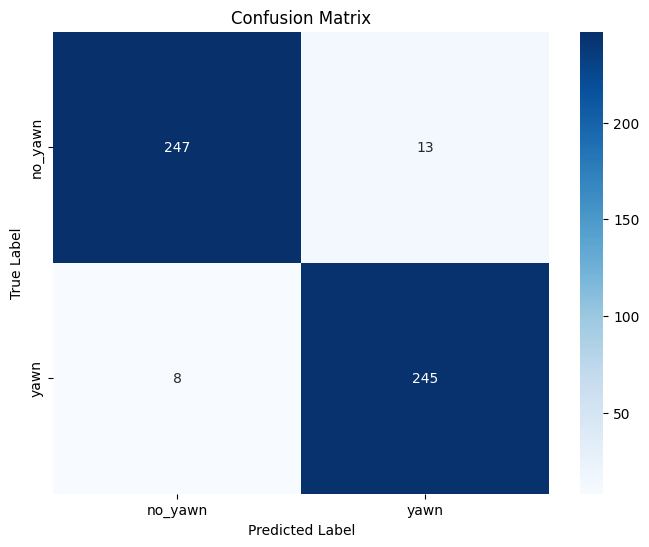

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to your dataset
train_dir = "C:/Users/brain/Desktop/VIGILO_DEPLOY/Test/1/train"
val_dir = "C:/Users/brain/Desktop/VIGILO_DEPLOY/Test/1/val"
test_dir = "C:/Users/brain/Desktop/VIGILO_DEPLOY/Test/1/test"  # New test directory

# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Same preprocessing for test set

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'  # Binary classification: yawn or no_yawn
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Keep the order for evaluation
)

# Build a CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Save the Model
model.save('yawn_detection_model.h5')

# Evaluate the Model on Test Set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Get Predictions on Test Set
test_generator.reset()
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels
true_labels = test_generator.classes

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
Confusion Matrix:
[[262 257]
 [246 260]]

Classification Report:
              precision    recall  f1-score   support

     no_yawn       0.52      0.50      0.51       519
        yawn       0.50      0.51      0.51       506

    accuracy                           0.51      1025
   macro avg       0.51      0.51      0.51      1025
weighted avg       0.51      0.51      0.51      1025


Accuracy: 0.51


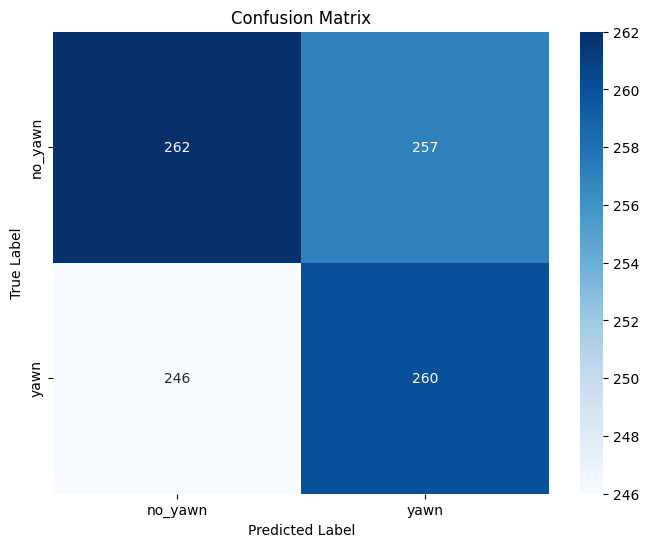

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Evaluate on Validation Set
val_generator.reset()  # Reset generator for predictions
predictions = model.predict(val_generator, verbose=1)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# True Labels
true_labels = val_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=val_generator.class_indices.keys()))

# Accuracy Score
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"\nAccuracy: {accuracy:.2f}")

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


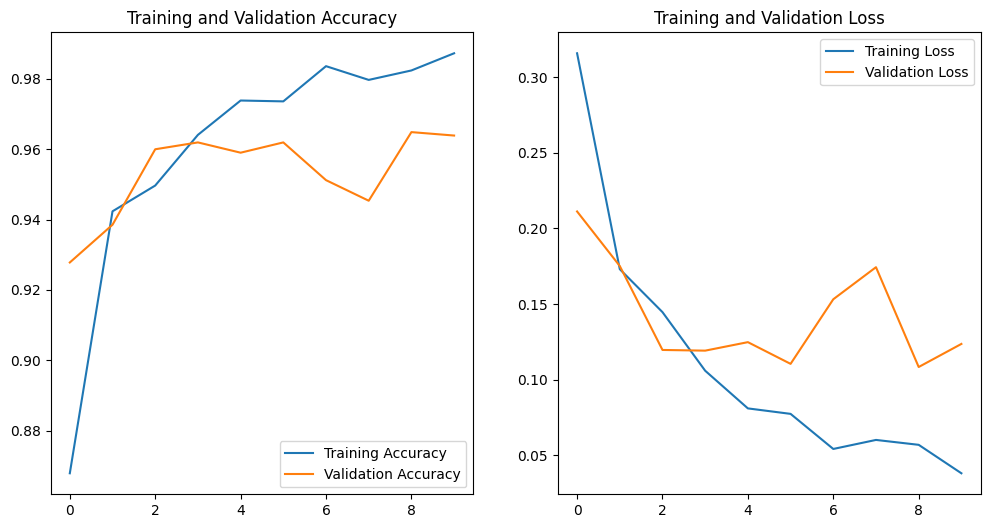

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Training and Validation Metrics
def plot_training_metrics(history):
    """
    Plot training and validation accuracy and loss.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_metrics(history)

# Grad-CAM Heatmap Visualization
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    """
    Generate a Grad-CAM heatmap for a given image.
    """
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap.numpy()

def display_gradcam(image_path, model, last_conv_layer_name, classifier_layer_names):
    """
    Display Grad-CAM heatmap overlaid on the image.
    """
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array / 255.0, axis=0)

    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names)

    # Load the original image
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale the heatmap to a range of 0 to 255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to apply heatmap
    jet = plt.cm.get_cmap("jet")

    # Create an RGB heatmap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with the heatmap overlaid
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    overlayed_img = jet_heatmap * 0.4 + img
    overlayed_img = tf.keras.preprocessing.image.array_to_img(overlayed_img)

    # Display the image
    plt.imshow(overlayed_img)
    plt.axis('off')
    plt.show()

In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
val_dir = "C:/Users/brain/Desktop/VIGILO_DEPLOY/Test/1/val"
new_val_dir = "C:/Users/brain/Desktop/VIGILO_DEPLOY/Test/1/new_val"
test_dir = "C:/Users/brain/Desktop/VIGILO_DEPLOY/Test/1/test"

# Create directories for new validation and test sets
os.makedirs(new_val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split each class in the validation set
for class_name in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_name)
    images = os.listdir(class_path)
    train_imgs, test_imgs = train_test_split(images, test_size=0.5, random_state=42)

    # Move new validation images
    new_val_class_path = os.path.join(new_val_dir, class_name)
    os.makedirs(new_val_class_path, exist_ok=True)
    for img in train_imgs:
        shutil.move(os.path.join(class_path, img), os.path.join(new_val_class_path, img))

    # Move test images
    test_class_path = os.path.join(test_dir, class_name)
    os.makedirs(test_class_path, exist_ok=True)
    for img in test_imgs:
        shutil.move(os.path.join(class_path, img), os.path.join(test_class_path, img))


In [13]:
import os

def list_image_paths(directory):
    return set([os.path.relpath(os.path.join(root, file), directory)
                for root, _, files in os.walk(directory) for file in files])

train_images = list_image_paths(train_dir)
val_images = list_image_paths(val_dir)
test_images = list_image_paths(test_dir)  # Replace with your test dataset

# Check for overlaps
print("Train-Val Overlap:", train_images.intersection(val_images))
print("Train-Test Overlap:", train_images.intersection(test_images))
print("Val-Test Overlap:", val_images.intersection(test_images))


Train-Val Overlap: set()
Train-Test Overlap: set()
Val-Test Overlap: set()


In [ ]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Predict on test set
test_generator.reset() 
predictions = model.predict(test_generator, verbose=1)
predicted_labels = (predictions > 0.5).astype(int)

# Analyze misclassifications
true_labels = test_generator.classes
misclassified_indices = [i for i, (true, pred) in enumerate(zip(true_labels, predicted_labels.flatten())) if true != pred]

print(f"Number of Misclassified Samples: {len(misclassified_indices)}")

# Display misclassified images (if needed)
for i in misclassified_indices[:5]:  # Display first 5 misclassified samples
    img, label = test_generator[i]
    plt.imshow(img[0])  # Show the first image in the batch
    plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.show()


NameError: name 'test_generator' is not defined